In [5]:
import pandas as pd
import matplotlib.pyplot as plt

loansData = pd.read_csv('../datasets/loansData.csv')
loansData.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [14]:
loansData.describe()

,Amount.Requested,Amount.Funded.By.Investors,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
count,2500.000000,2500.000000,2499.000000,2498.000000,2498.000000,2498.000000
mean,12406.500000,12001.573236,5688.931321,10.075661,15244.559648,0.906325
std,7801.544872,7745.320754,3963.118185,4.508644,18308.549795,1.231036
min,1000.000000,-0.010000,588.500000,2.000000,0.000000,0.000000
25%,6000.000000,6000.000000,3500.000000,7.000000,5585.750000,0.000000
50%,10000.000000,10000.000000,5000.000000,9.000000,10962.000000,0.000000
75%,17000.000000,16000.000000,6800.000000,13.000000,18888.750000,1.000000
max,35000.000000,35000.000000,102750.000000,38.000000,270800.000000,9.000000


In [15]:
loansData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 81174 to 3116
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2500 non-null   int64  
 1   Amount.Funded.By.Investors      2500 non-null   float64
 2   Interest.Rate                   2500 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2500 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2500 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2500 non-null   object 
 10  Open.CREDIT.Lines               2498 non-null   float64
 11  Revolving.CREDIT.Balance        2498 non-null   float64
 12  Inquiries.in.the.Last.6.Months  249

In [44]:
# convert objects to strings
loansData['Interest.Rate'] = loansData['Interest.Rate'].astype('str') 
loansData['Loan.Length'] = loansData['Loan.Length'].astype('str') 
loansData['Debt.To.Income.Ratio'] = loansData['Debt.To.Income.Ratio'].astype('str') 
loansData['FICO.Range'] = loansData['FICO.Range'].astype('str') 

# remove unwanted text from the values and convert to int and float
loansData['Interest.Rate'] = loansData['Interest.Rate'].str.replace('%', '').astype('float64')
loansData['Loan.Length'] = loansData['Loan.Length'].str.replace('months', '').astype('int64')
loansData['Debt.To.Income.Ratio'] = loansData['Debt.To.Income.Ratio'].str.replace('%', '').astype('float64')

loansData.dropna()
loansData.drop_duplicates()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.00,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.00,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.00,21.98,60,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.00,9.99,36,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.00,11.71,36,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23735,30000,29950.00,16.77,60,debt_consolidation,19.23,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
65882,16000,16000.00,14.09,60,home_improvement,21.54,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
55610,10000,10000.00,13.99,36,debt_consolidation,4.89,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
38576,6000,6000.00,12.42,36,major_purchase,16.66,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


In [11]:
df = pd.read_csv('../datasets/loanf.csv')

df.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891.67,6000
11,19.72,670,36,3575.00,2000
12,14.27,665,36,4250.00,10625
13,21.67,670,60,14166.67,28000
21,21.98,665,36,6666.67,22000


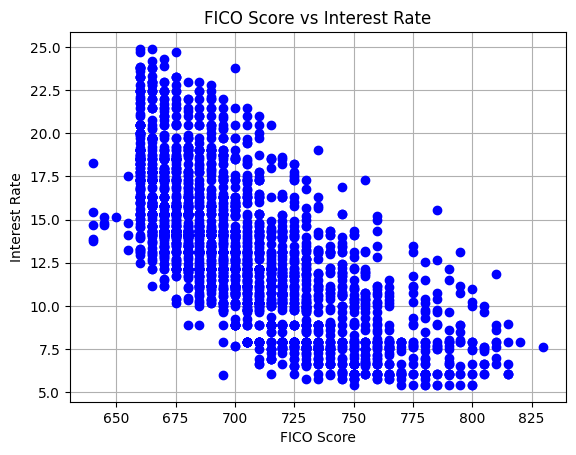

In [27]:
interest_rate = df['Interest.Rate']
fico = df['FICO.Score']
plt.plot(fico, interest_rate, 'bo')
plt.title('FICO Score vs Interest Rate')
plt.xlabel('FICO Score')
plt.ylabel('Interest Rate')
plt.grid(True)
plt.show()

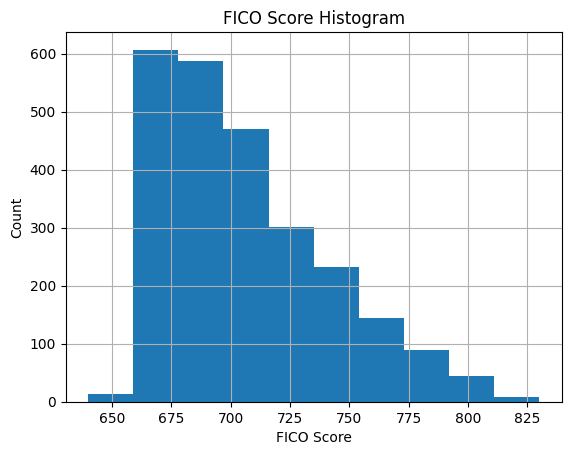

In [32]:
plt.figure()
plt.hist(df['FICO.Score'])
plt.title('FICO Score Histogram')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.grid(True)
plt.show()

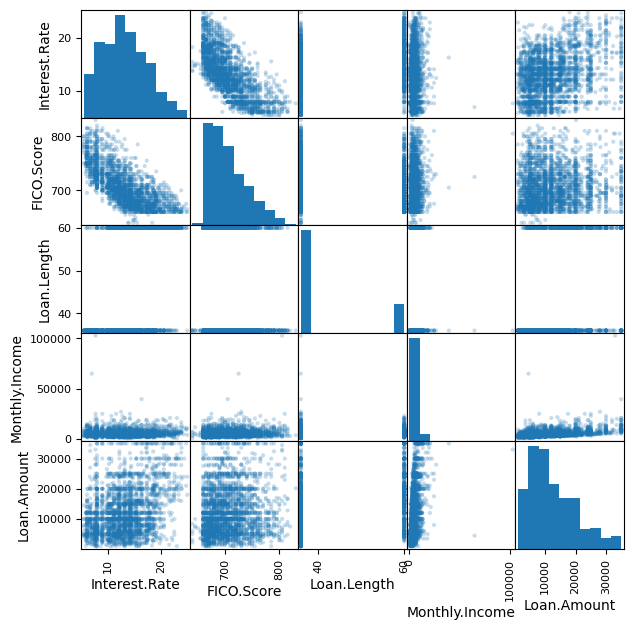

In [45]:
from pandas.plotting import scatter_matrix

# scatter matrix to determine which variables to consider for the model
a = scatter_matrix(df, alpha = 0.25, figsize = (7, 7), diagonal = 'hist')

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('../datasets/loanf.csv')

X = df[['FICO.Score', 'Loan.Amount']]
y = df['Interest.Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 6.353048263587604
R-squared: 0.6268390811593397


In [6]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

             Coefficient
FICO.Score      -0.08956
Loan.Amount      0.00021


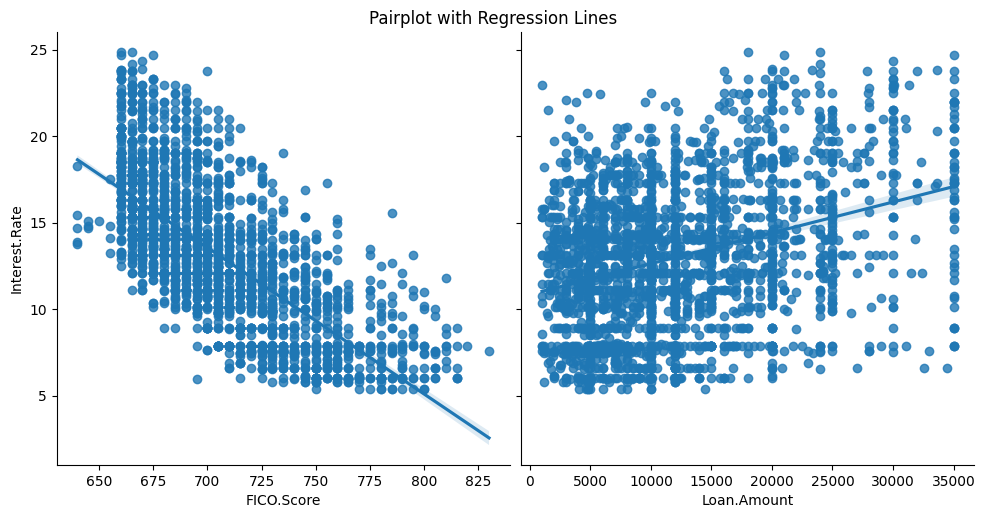

In [6]:
# pairplot with regression line
sns.pairplot(df, x_vars=['FICO.Score', 'Loan.Amount'], y_vars='Interest.Rate', height=5, aspect=1, kind='reg')
plt.suptitle('Pairplot with Regression Lines', y=1.02)
plt.show()

C:\Users\anush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


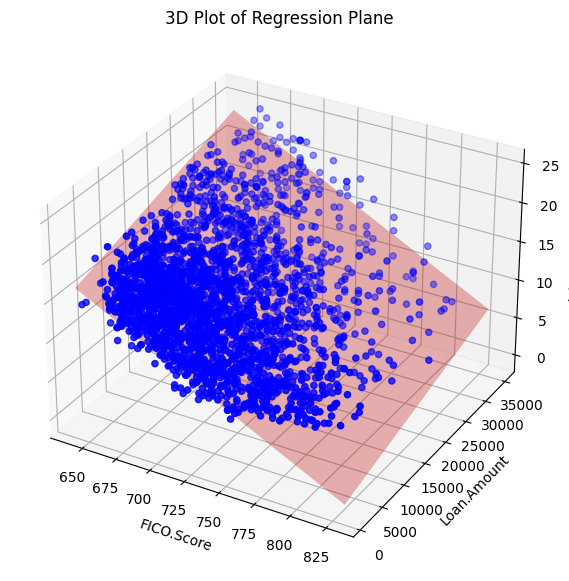

In [15]:
# 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting actual data points
ax.scatter(X['FICO.Score'], X['Loan.Amount'], y, color='blue', label='Actual')

# Plotting the regression plane
X_surf, Y_surf = np.meshgrid(np.linspace(X['FICO.Score'].min(), X['FICO.Score'].max(), 100), 
                             np.linspace(X['Loan.Amount'].min(), X['Loan.Amount'].max(), 100))
Z_surf = model.predict(np.array([X_surf.ravel(), Y_surf.ravel()]).T).reshape(X_surf.shape)

ax.plot_surface(X_surf, Y_surf, Z_surf, color='red', alpha=0.3, label='Regression Plane')

ax.set_xlabel('FICO.Score')
ax.set_ylabel('Loan.Amount')
ax.set_zlabel('Interest.Rate')
plt.title('3D Plot of Regression Plane')
# plt.legend()
plt.show()